In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [79]:
class LogReg:
    def __init__(self):
        self.w = None
        self.b = None
    
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    @staticmethod
    def cost_function(x_train, y_train, w, b):
        m = x_train.shape[0]
        z = x_train @ w + b
        return - (1 / m) * (np.dot(y_train, np.log(LogReg.sigmoid(z))) + np.dot(1 - y_train, np.log(1 - LogReg.sigmoid(z))))
    
    def train(self, x_train, y_train, alpha, iter=1000):
        x_train = np.array(x_train)
        y_train = np.array(y_train).flatten()

        if x_train.ndim == 1:
            x_train = x_train.reshape(-1, 1)  # Ensure 2D shape

        m, n = x_train.shape
        w = np.zeros(n)
        b = 0.

        for i in range(iter):
            z = x_train @ w + b
            h = LogReg.sigmoid(z)

            dcost_dw = (1 / m) * (x_train.T @ (h - y_train))
            dcost_db = (1 / m) * np.sum(h - y_train)

            w -= alpha * dcost_dw
            b -= alpha * dcost_db

        self.w = w 
        self.b = b

        return self.w, self.b
    
    def predict(self, x):
        """
        Predicts the class labels for a given input using the logistic regression model.
        
        Args:
            x (numpy.ndarray): Input feature data (2D array of shape [m, n]).
            
        Returns:
            numpy.ndarray: Predicted class labels (1D array of 0s and 1s).
        """
        probabilities = LogReg.sigmoid(x @ self.w + self.b)
        predictions = probabilities > 0.5  # Element-wise comparison to get binary predictions
        return predictions.astype(int)  # Convert boolean to 0/1 for class labels

    def learning_curve(self, alpha_min, alpha_max, x_train, y_train, iter=1000):
        x_train = np.array(x_train)
        y_train = np.array(y_train).flatten()

        if x_train.ndim == 1:
            x_train = x_train.reshape(-1, 1)  # Ensure 2D shape

        m, n = x_train.shape
        alphas = np.linspace(alpha_min, alpha_max, 4)

        for alpha in alphas:
            w = np.zeros(n)
            b = 0.
            cost_vec = []

            for i in range(iter):
                z = x_train @ w + b
                h = LogReg.sigmoid(z)

                dcost_dw = (1 / m) * (x_train.T @ (h - y_train))
                dcost_db = (1 / m) * np.sum(h - y_train)

                w -= alpha * dcost_dw
                b -= alpha * dcost_db
                cost_vec.append(LogReg.cost_function(x_train, y_train, w, b))

            plt.plot(range(iter), cost_vec, label=f"alpha={alpha:.2e}")

        plt.xlabel("Iterations")
        plt.ylabel("Cost function")
        plt.title("Learning curves for different learning rates")
        plt.legend()
        plt.grid(True)
        plt.show()


In [86]:
X, y = make_classification(n_samples=1000,    # Number of samples
                           n_features=5,      # Only one feature
                           n_informative=5,   # One informative feature
                           n_redundant=0,     # No redundant features
                           n_classes=2,       # Binary classification
                           n_clusters_per_class=1,  # One cluster per class (avoids error)
                           random_state=42)   # Reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

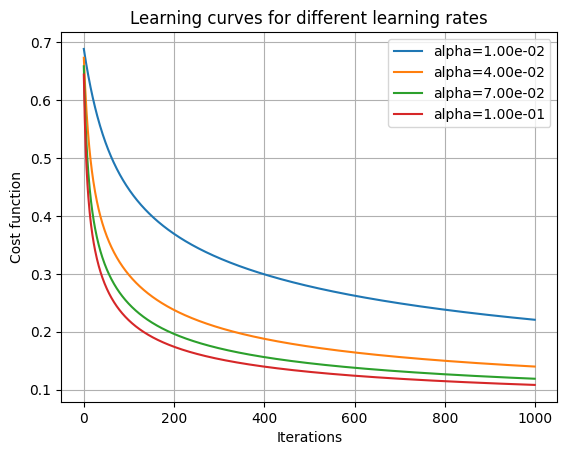

In [87]:
my_model = LogReg()
my_model.learning_curve(0.01, 0.1, X_train, y_train)

In [88]:
my_model.train(X_train, y_train, 0.1)

(array([ 0.2136319 ,  0.50845043,  0.53614278, -3.84040646,  1.34174924]),
 -1.389853879886451)

In [111]:
my_model.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1])

In [113]:
aaa = 1